In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r"E:\Data Projects\Customer Segmentation Project\customer_segmentation.csv")

In [6]:
df = data.copy()

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('category')

In [12]:
df.dtypes

InvoiceNo      category
StockCode      category
Description    category
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID      float64
Country          object
dtype: object

In [13]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [14]:
df.dtypes

InvoiceNo            category
StockCode            category
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  category      
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  category      
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 25.3+ MB


In [16]:
most_common_description = df['Description'].mode()[0]  
df['Description']=df['Description'].fillna(most_common_description)

In [17]:
most_values = df['CustomerID'].mean()
df['CustomerID']=df['CustomerID'].fillna(most_values)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  category      
 1   StockCode    541909 non-null  category      
 2   Description  541909 non-null  category      
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 25.3+ MB


In [19]:
df.duplicated().sum()

5268

In [20]:
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [23]:
# Remove rows where Quantity or UnitPrice are less than or equal to 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [24]:
df.describe(include = 'all')

<ipython-input-24-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,524878,524878,524878,524878.000000,524878,524878.000000,524878.000000,524878
unique,19960,3922,4026,NaN,18499,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2253,2311,NaN,1114,NaN,NaN,479985
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.616600,NaN,3.922573,15287.805259,NaN
std,NaN,NaN,NaN,156.280031,NaN,36.093028,1482.145486,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14375.000000,NaN


In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
#Recency
max_date = df['InvoiceDate'].max()
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (max_date - last_purchase).dt.days
recency_df = recency.reset_index()
recency_df.columns = ['CustomerID', 'Recency']
recency_df = recency_df.sort_values(by='Recency', ascending=False)

print(recency_df.head())

      CustomerID  Recency
3104     16583.0      373
1749     14729.0      373
1037     13747.0      373
4181     18074.0      373
4065     17908.0      373


In [27]:
# Frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency_df = frequency.reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)
print(frequency_df.head())

       CustomerID  Frequency
2160  15287.69057       1428
326   12748.00000        209
1879  14911.00000        201
4011  17841.00000        124
562   13089.00000         97


In [28]:
#Monetary
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum()
monetary_df = monetary.reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df = monetary_df.sort_values(by='Monetary', ascending=False)
print(monetary_df.head())

       CustomerID      Monetary
2160  15287.69057  1.754902e+06
1689  14646.00000  2.802060e+05
4202  18102.00000  2.596573e+05
3729  17450.00000  1.943908e+05
3009  16446.00000  1.684725e+05


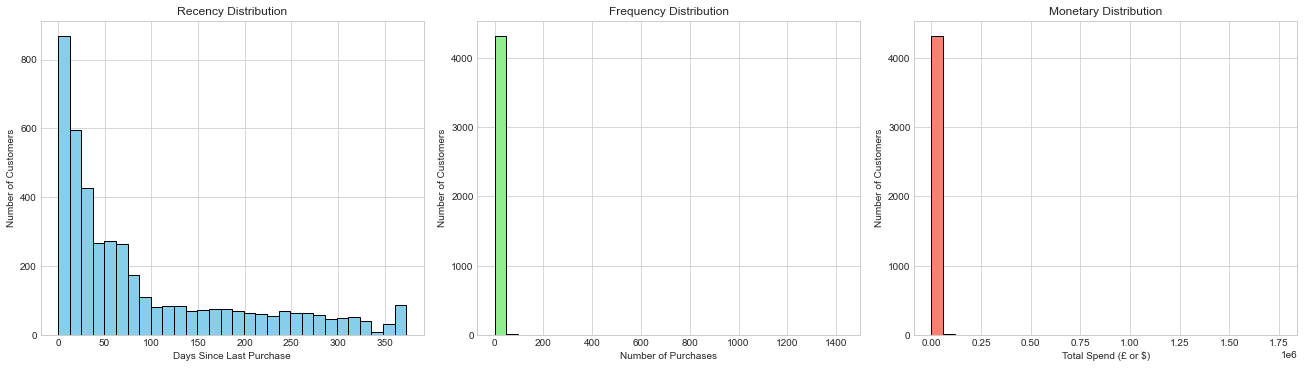

In [34]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Histogram for Recency
axes[0].hist(recency_df['Recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')
axes[0].set_ylabel('Number of Customers')

# Histogram for Frequency
axes[1].hist(frequency_df['Frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Number of Customers')

# Histogram for Monetary
axes[2].hist(monetary_df['Monetary'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend (£ or $)')
axes[2].set_ylabel('Number of Customers')

plt.show()


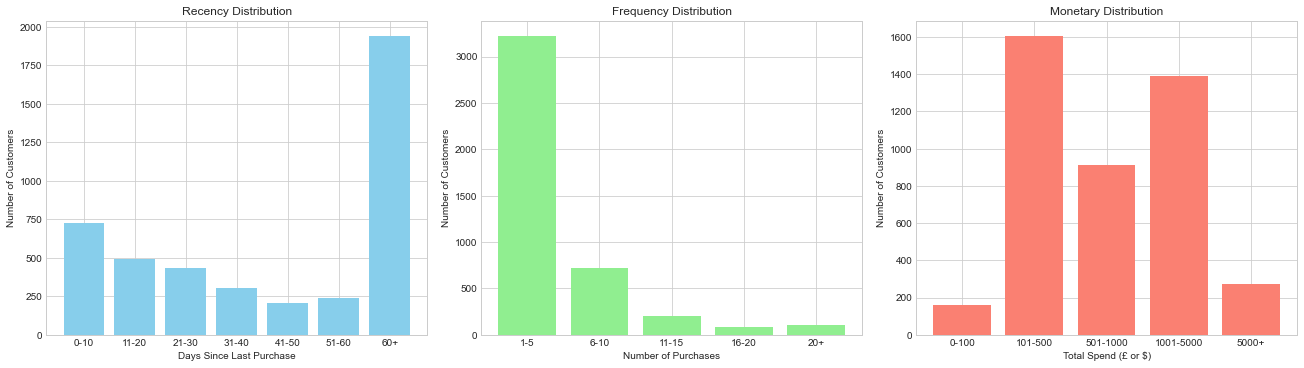

In [30]:
#For Recency
bins_recency = [0, 10, 20, 30, 40, 50, 60, recency_df['Recency'].max() + 1]
labels_recency = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']
recency_binned = pd.cut(recency_df['Recency'], bins=bins_recency, labels=labels_recency, right=False)
counts_recency = recency_binned.value_counts().sort_index()

# For Frequency
bins_frequency = [0, 5, 10, 15, 20, frequency_df['Frequency'].max() + 1]
labels_frequency = ['1-5', '6-10', '11-15', '16-20', '20+']
frequency_binned = pd.cut(frequency_df['Frequency'], bins=bins_frequency, labels=labels_frequency, right=False)
counts_frequency = frequency_binned.value_counts().sort_index()

# For Monetary
bins_monetary = [0, 100, 500, 1000, 5000, monetary_df['Monetary'].max() + 1]
labels_monetary = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
monetary_binned = pd.cut(monetary_df['Monetary'], bins=bins_monetary, labels=labels_monetary, right=False)
counts_monetary = monetary_binned.value_counts().sort_index()

plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18,5), constrained_layout=True)

# Recency
axes[0].bar(counts_recency.index, counts_recency.values, color='skyblue')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')
axes[0].set_ylabel('Number of Customers')

# Frequency
axes[1].bar(counts_frequency.index, counts_frequency.values, color='lightgreen')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Number of Customers')

# Monetary
axes[2].bar(counts_monetary.index, counts_monetary.values, color='salmon')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend (£ or $)')
axes[2].set_ylabel('Number of Customers')

plt.show()
